## Analysis of some univariate time series by using matrix algebra


Let's  use matrices to solve some (famous) difference equations.

In [232]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

As our running example, we'll study a **second-order  linear difference equation** that was the key technical tool in 
Paul Samuelson's 1939 article that introduced the **multiplier-accelerator** model.

You can read about details of  that model in this quantecon lecture

   https://python.quantecon.org/samuelson.html
   
(that lecture also describes technicalities about second order linear difference equations)
   
   


Let $t = 0, \pm 1, \pm 2, \ldots $ index time.

For $t = 1, 2, 3, \ldots, T$ suppose that

$$
y_{t} = \alpha_{0} + \alpha_{1} y_{t-1} + \alpha_{2} y_{t-2}
\label{eqn:1} \tag{1}$$

where we assume that $y_0$ and $y_{-1}$ are given numbers that we take as **initial conditions**.  

Equation $\eqref{eqn:1}$ is called a **second-order linear difference equation**.

But actually, it is a collection of $T$ simultaneous linear equations in the $T$ variables
$y_1, y_2, \ldots, y_T$.

**Note:** To be able to solve a second-order linear difference equations, we require
two **boundary conditions**. These can take the form either of two **initial conditions**
or two **terminal conditions** or possibly one of each.







Let's write our equations as a stacked system

$$
\underset{\equiv A}{\underbrace{\left[\begin{array}{cccccccc}
1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0\\
-\alpha_{1} & 1 & 0 & 0 & \cdots & 0 & 0 & 0\\
-\alpha_{2} & -\alpha_{1} & 1 & 0 & \cdots & 0 & 0 & 0\\
0 & -\alpha_{2} & -\alpha_{1} & 1 & \cdots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \cdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \cdots & -\alpha_{2} & -\alpha_{1} & 1
\end{array}\right]}}\left[\begin{array}{c}
y_{1}\\
y_{2}\\
y_{3}\\
y_{4}\\
\vdots\\
y_{T}
\end{array}\right]=\underset{\equiv b}{\underbrace{\left[\begin{array}{c}
\alpha_{0}+\alpha_{1}y_{0}+\alpha_{2}y_{-1}\\
\alpha_{0}+\alpha_{2}y_{0}\\
\alpha_{0}\\
\alpha_{0}\\
\vdots\\
\alpha_{0}
\end{array}\right]}}
$$


or

$$ A y = b $$

where 

$$ y = \begin{bmatrix} y_1 \cr y_2 \cr \cdots \cr y_T \end{bmatrix} $$

Evidently $y$ can be computed from

$$
y = A^{-1} b
$$

The vector $y$ is a complete time path  $\{y_t\}_{t=1}^T$.

Let's put Python to work on an example that captures the flavor of Samuelson's
multiplier-accelerator model.

In [233]:
T = 80

# parameters
𝛼0 = 10.0
𝛼1 = 1.53
𝛼2 = -.9

y_1 = 28. # y_{-1}
y0 = 24.

In [234]:
# construct A and b
A = np.zeros((T, T))

for i in range(T):
    A[i, i] = 1

    if i-1 >= 0:
        A[i, i-1] = -𝛼1

    if i-2 >= 0:
        A[i, i-2] = -𝛼2

b = np.ones(T) * 𝛼0
b[0] = 𝛼0 + 𝛼1 * y0 + 𝛼2 * y_1
b[1] = 𝛼0 + 𝛼2 * y0

Let's look at the matrix $A$ and the vector $b$ for our example.

In [235]:
A, b

(array([[ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [-1.53,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.9 , -1.53,  1.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [ 0.  ,  0.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ..., -1.53,  1.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.9 , -1.53,  1.  ]]),
 array([ 21.52, -11.6 ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10

Now let's solve for the path of $y$.

If $y_t$ is GNP at time $t$, then we have a version of Samuelson's model of the
dynamics for GNP.

In [236]:
A_inv = np.linalg.inv(A)

y = A_inv @ b

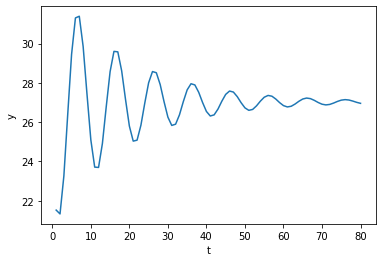

In [237]:
plt.plot(np.arange(T)+1, y)
plt.xlabel('t')
plt.ylabel('y')

plt.show()

If we start with

$$
y_{0} = y_{-1} = \frac{\alpha_{0}}{1 - \alpha_{1} - \alpha_{2}}
$$

then $y_{t}$ will be constant

In [238]:
y_1_steady = 𝛼0 / (1 - 𝛼1 - 𝛼2) # y_{-1}
y0_steady = 𝛼0 / (1 - 𝛼1 - 𝛼2)

b_steady = np.ones(T) * 𝛼0
b_steady[0] = 𝛼0 + 𝛼1 * y0_steady + 𝛼2 * y_1_steady
b_steady[1] = 𝛼0 + 𝛼2 * y0_steady

In [239]:
y_steady = A_inv @ b_steady

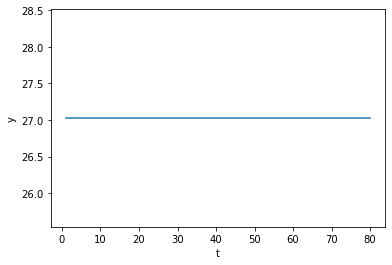

In [240]:
plt.plot(np.arange(T)+1, y_steady)
plt.xlabel('t')
plt.ylabel('y')

plt.show()

### Adding a random term

Now we'll generate more excitement in the spirit of the great economists
Slusky and Frisch by replacing our original second order difference equation with the following **second order stochastic linear difference equation**.


$$
y_{t} = \alpha_{0} + \alpha_{1} y_{t-1} + \alpha_{2} y_{t-2} + u_t
\label{eqn:2} \tag{2}$$

where $u_{t} \sim N\left(0, \sigma_{u}^{2}\right)$ and is i.i.d.

We'll stack these  $T$ equations into a system cast in terms of matrix algebra. 

Let's define the random vector

$$
u=\left[\begin{array}{c}
u_{1}\\
u_{2}\\
\vdots\\
u_{T}
\end{array}\right]
$$



Where $A, b, y$ are defined as above, now assume that $y$ is governed by the
system

$$
A y = b + u
$$

The solution for $y$ becomes

$$
y = A^{-1} \left(b + u\right)
$$

Let's try it out in Python.

In [241]:
𝜎u = 2.

In [242]:
u = np.random.normal(0, 𝜎u, size=T)
y = A_inv @ (b + u)

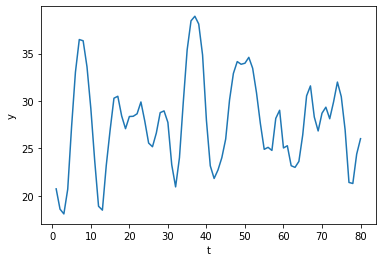

In [243]:
plt.plot(np.arange(T)+1, y)
plt.xlabel('t')
plt.ylabel('y')

plt.show()

The above time series looks a lot like (detrended) GDP series for a number of
advanced countries in recent decades.

We can simulate $N$ paths.

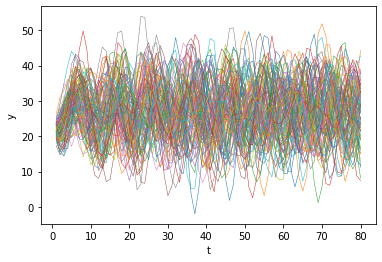

In [244]:
N = 100

for i in range(N):
    u = np.random.normal(0, 𝜎u, size=T)
    y = A_inv @ (b + u)
    plt.plot(np.arange(T)+1, y, lw=0.5)

plt.xlabel('t')
plt.ylabel('y')

plt.show()

Also consider the case when $y_{0}$ and $y_{-1}$ are at steady state.

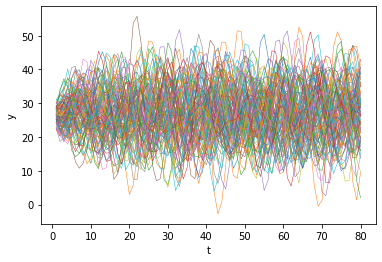

In [245]:
N = 100

for i in range(N):
    u = np.random.normal(0, 𝜎u, size=T)
    y_steady = A_inv @ (b_steady + u)
    plt.plot(np.arange(T)+1, y_steady, lw=0.5)

plt.xlabel('t')
plt.ylabel('y')

plt.show()

## Forward looking models with linear algebra

Samuelson's model is *backwards looking* in a sense.  

Let's now turn to a very *forward looking* model.

We can apply similar linear algebra machinery to study a **perfect foresight** model widely used as a benchmark in macroeconomics and finance.

As an example, we suppose that $p_t$ is  the price of a stock and that $y_t$ is its dividend.

We assume that $y_t$ is determined by second-order difference equation that we analyzed just above so that


$$
y = A^{-1} \left(b + u\right)
$$

Our **perfect foresight** model of stock prices is

$$
p_{t} = \sum_{j=0}^{T-t} \beta^{j} y_{t+j}, \quad \beta \in (0,1)
$$

where $\beta $ is a discount factor.

The model asserts that the price of the stock at $t$ equals the discounted present
values of the (perfectly foreseen) future dividends.  

Form

$$
\underset{\equiv p}{\underbrace{\left[\begin{array}{c}
p_{1}\\
p_{2}\\
p_{3}\\
\vdots\\
p_{T}
\end{array}\right]}}=\underset{\equiv B}{\underbrace{\left[\begin{array}{ccccc}
1 & \beta & \beta^{2} & \cdots & \beta^{T-1}\\
0 & 1 & \beta & \cdots & \beta^{T-2}\\
0 & 0 & 1 & \cdots & \beta^{T-3}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & \cdots & 1
\end{array}\right]}}\left[\begin{array}{c}
y_{1}\\
y_{2}\\
y_{3}\\
\vdots\\
y_{T}
\end{array}\right]
$$

In [246]:
𝛽 = .96


In [247]:
# construct B
B = np.zeros((T, T))

for i in range(T):
    B[i, i:] = 𝛽 ** np.arange(0, T-i)

In [248]:
B

array([[1.        , 0.96      , 0.9216    , ..., 0.04314048, 0.04141486,
        0.03975826],
       [0.        , 1.        , 0.96      , ..., 0.044938  , 0.04314048,
        0.04141486],
       [0.        , 0.        , 1.        , ..., 0.04681041, 0.044938  ,
        0.04314048],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.96      ,
        0.9216    ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.96      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [249]:
𝜎u = 0.
u = np.random.normal(0, 𝜎u, size=T)
y = A_inv @ (b + u)
y_steady = A_inv @ (b_steady + u)

In [250]:
p = B @ y

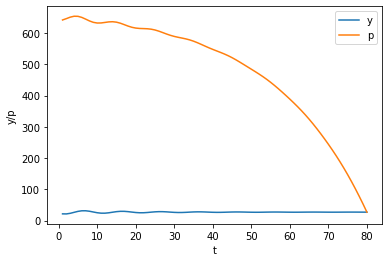

In [251]:
plt.plot(np.arange(0, T)+1, y, label='y')
plt.plot(np.arange(0, T)+1, p, label='p')
plt.xlabel('t')
plt.ylabel('y/p')
plt.legend()

plt.show()

Can you explain why the trend of the price is downward over time?  

Also consider the case when $y_{0}$ and $y_{-1}$ are at the steady state.

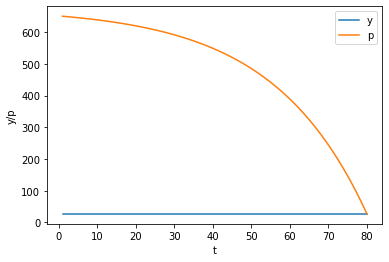

In [252]:
p_steady = B @ y_steady

plt.plot(np.arange(0, T)+1, y_steady, label='y')
plt.plot(np.arange(0, T)+1, p_steady, label='p')
plt.xlabel('t')
plt.ylabel('y/p')
plt.legend()

plt.show()